In [1]:
import numpy
import math

f1=1.0
def u(t):
    return 0.4+1.0*numpy.cos(2*numpy.pi*f1*t)\
            +0.5*numpy.cos(2*2*numpy.pi*f1*t-numpy.pi/3)\
            +0.2*numpy.cos(3*2*numpy.pi*f1*t+numpy.pi/4)

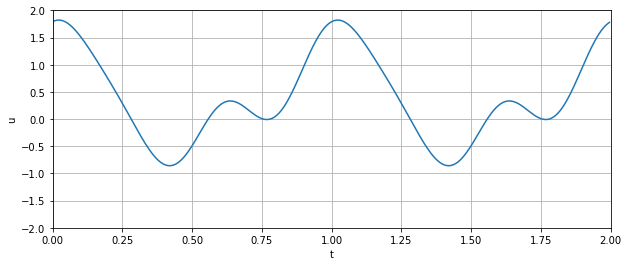

In [3]:
import numpy
N = 500
Tmax = 2.0
Te = Tmax/N
t = numpy.arange(N)*Te
x = u(t)

from matplotlib.pyplot import *
figure(figsize=(10,4))
plot(t,x)
xlabel('t')
ylabel('u')
axis([0,2,-2,2])
grid()

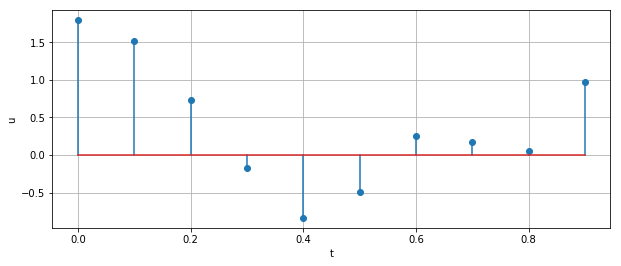

In [5]:
N = 10
Tmax = 1.0
Te = Tmax/N
t = numpy.arange(0,N)*Te
x=u(t)
figure(figsize=(10,4))
stem(t,x)
xlabel('t')
ylabel('u')
grid()

In [6]:
import numpy.fft
tfd = numpy.fft.fft(x)
print(tfd)

[4.00000000e+00+0.00000000e+00j 5.00000000e+00+6.02797884e-17j
 1.25000000e+00-2.16506351e+00j 7.07106781e-01+7.07106781e-01j
 0.00000000e+00-5.47830103e-16j 4.44089210e-16+0.00000000e+00j
 0.00000000e+00+5.47830103e-16j 7.07106781e-01-7.07106781e-01j
 1.25000000e+00+2.16506351e+00j 5.00000000e+00-6.02797884e-17j]


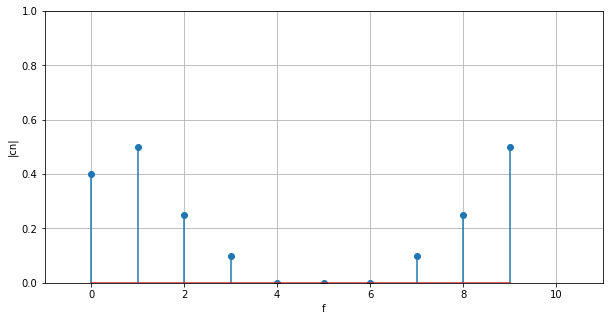

In [7]:
figure(figsize=(10,5))
f=numpy.arange(0,N,1)
stem(f,numpy.absolute(tfd)/N) 
xlabel("f")
ylabel("|cn|")
axis([-1,11,0,1])
grid()

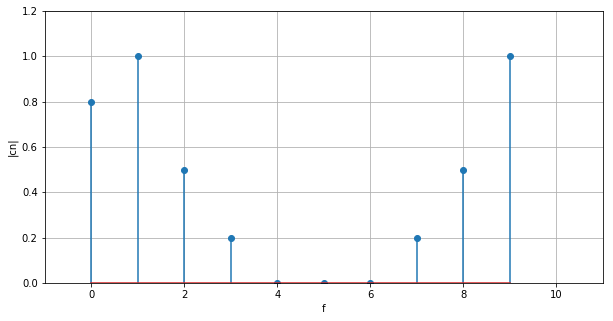

In [8]:
figure(figsize=(10,5))
f=numpy.arange(0,N,1)
stem(f,numpy.absolute(tfd)*2/N) 
xlabel("f")
ylabel("|cn|")
axis([-1,11,0,1.2])
grid()

D:\Programmes\Developpement\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


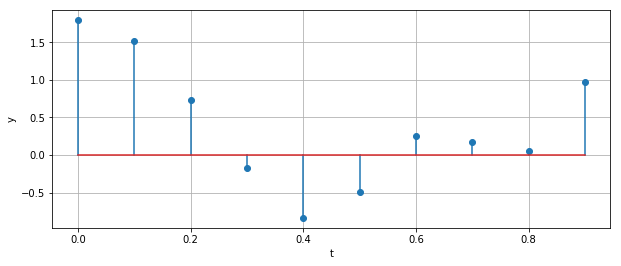

In [9]:
y = numpy.fft.ifft(tfd)
figure(figsize=(10,4))
stem(t,y)
xlabel('t')
ylabel('y')
grid()

D:\Programmes\Developpement\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


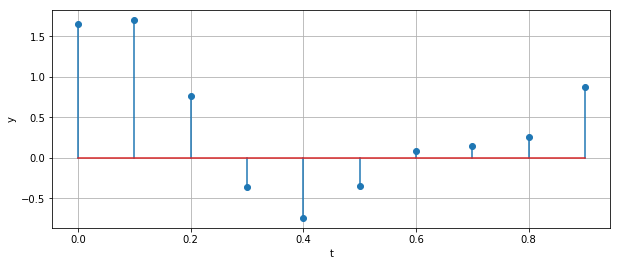

In [10]:
i=3
tfd[i] = 0
tfd[N-i] = 0
y = numpy.fft.ifft(tfd)
figure(figsize=(10,4))
stem(t,y)
xlabel('t')
ylabel('y')
grid()

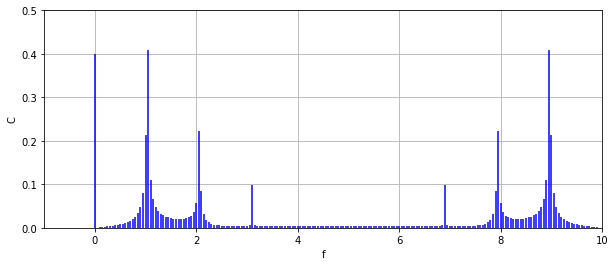

In [14]:
f1 = 1.0324
T=20.0
fe=10.0
N=int(T*fe)
t = numpy.arange(0,N)*Te
x=u(t)
tfd=numpy.fft.fft(x)
f=numpy.arange(0,N)*1.0/T
figure(figsize=(10,4))
vlines(f,[0],numpy.absolute(tfd)/N,'b')
xlabel('f')
ylabel('C')
axis([-1,10,0,0.5])
grid()

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
fs = 1e4
N = 1e5
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

In [3]:
f, Pper_spec = signal.periodogram(x, fs, 'flattop', scaling='spectrum')

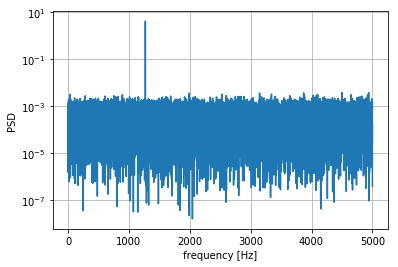

In [4]:
plt.semilogy(f, Pper_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

In [6]:
f, Pwelch_spec = signal.welch(x, fs, scaling='spectrum')

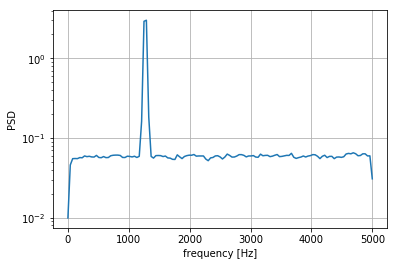

In [7]:
plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

In [2]:
import numpy as np
from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [3]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

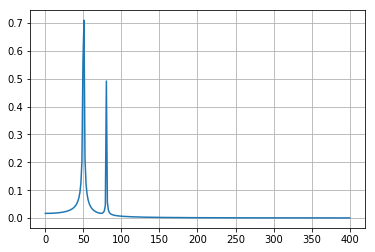

In [5]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

D:\Programmes\Developpement\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


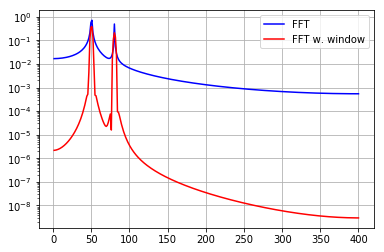

In [6]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

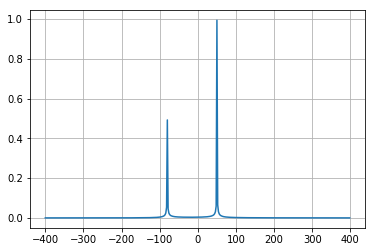

In [7]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [8]:
from scipy.fftpack import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
fft(x)

array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 +0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [9]:
yr = rfft(x)
yr

array([ 5.5       ,  2.25      , -0.4330127 , -2.75      , -1.29903811,
        1.5       ])

In [10]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [11]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
fft(x)

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [12]:
yr = rfft(x)
yr

array([ 4.5       ,  2.08155948, -1.65109876, -1.83155948,  1.60822041])

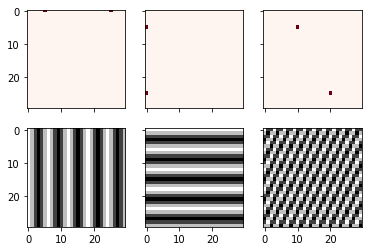

In [13]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

In [14]:
from scipy.fftpack import dct, idct
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [15]:
# scaling factor 2*N = 10
idct(dct(x, type=2), type=2)

array([ 10.,  20.,  10., -10.,  15.])

In [16]:
 # no scaling factor
idct(dct(x, type=2, norm='ortho'), type=2, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [17]:
# scaling factor 2*N = 10
idct(dct(x, type=3), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [18]:
 # no scaling factor
idct(dct(x, type=3, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [19]:
 # scaling factor 2*(N-1) = 8
idct(dct(x, type=1), type=1)

array([ 8., 16.,  8., -8., 12.])

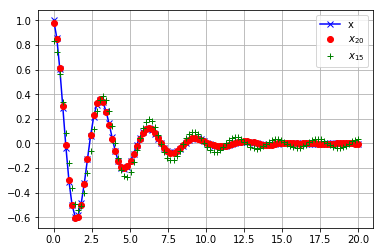

In [20]:
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0,20,N)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()